<a href="https://colab.research.google.com/github/Manohar2005-tech/AIML_Projects_and_Labs/blob/main/Assignment_STP_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1, Lab 1: Introduction to Machine Learning and Feature Extraction

## What is Machine Learning?

Machine learning is a branch of artificial intelligence that enables computers to learn patterns from data without being explicitly programmed. Instead of writing specific rules, we train algorithms on examples to make predictions or decisions.

### Types of Machine Learning

**1. Supervised Learning**
- The algorithm learns from labeled data (input-output pairs)
- Goal: Learn a mapping function from inputs to outputs
- Two main types:
  - **Classification**: Predicting categories (e.g., spam/not spam, digit 0-9)
  - **Regression**: Predicting continuous values (e.g., house prices, temperature)

**2. Unsupervised Learning**
- The algorithm finds patterns in unlabeled data
- Goal: Discover hidden structure or relationships
- Examples: Clustering, dimensionality reduction

---

**Links**

Video - https://youtu.be/hsJidtpHHyo?si=O8Hp2aqvNUELkvmt

Text - https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/



**Quick ML Examples with Scikit-Learn**
Example 1: Classification with Iris

# Extracting features from data

Module 1, Lab 1<br>



In [260]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

iris = load_iris()
X, y = iris.data, iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df["target"] = y
print("Dataset preview:\n", df.head(), "\n")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}\n")

print(" Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

new_sample = [[5.1, 3.5, 1.4, 0.2]]
prediction = knn.predict(new_sample)
print(f" Predicted class for {new_sample} → {iris.target_names[prediction][0]}")


Dataset preview:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   

Model Accuracy: 95.56%

 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

 Pre

### Example 2: Regression with Boston Housing Dataset

In [261]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

housing = fetch_california_housing()
X, y = housing.data[:600], housing.target[:600]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error : {mse:.3f}")
print(f"R² Score           : {r2:.3f}")
print(f"\nFirst 5 Predictions : {np.round(predictions[:5], 2)}")
print(f"First 5 Actuals     : {np.round(y_test[:5], 2)}")


Mean Squared Error : 0.251
R² Score           : 0.712

First 5 Predictions : [1.45 1.74 2.3  1.75 1.73]
First 5 Actuals     : [1.29 1.06 2.42 2.21 1.35]


## Understanding Features in Machine Learning

### What are Features?

**Features** are measurable properties or characteristics of your data that you use as input for machine learning algorithms. Think of them as columns in a spreadsheet.

**Example**: If you're predicting house prices:
- Features might include: square footage, number of bedrooms, location, age of house
- Target/Label: the price (what you want to predict)


In [262]:
# Example feature representation
house_data = {
    'square_feet': [1500, 2000, 1200, 1800],
    'bedrooms': [3, 4, 2, 3],
    'age_years': [10, 5, 15, 8],
    'price': [300000, 450000, 250000, 380000]  # This is the target
}

### Why CSV Format?

CSV (Comma-Separated Values) is one of the most common formats for ML datasets because:

1. **Structured**: Data is organized in rows and columns (tabular format)
2. **Easy to read**: Both humans and machines can parse it easily
3. **Universal**: Works with all ML libraries (scikit-learn, pandas, TensorFlow, etc.)

**CSV Structure:**
```
feature1,feature2,feature3,target
1.2,3.4,5.6,0
2.3,4.5,6.7,1
3.4,5.6,7.8,0
```

Each row = one sample/observation
Each column = one feature
Last column = target/label (what we want to predict)

### Converting Raw Data to Features

In [263]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

texts = ["Love this phone", "Terrible service", "Amazing camera quality"]

vectorizer = CountVectorizer()
features = vectorizer.fit_transform(texts)

print("Array representation of text features:\n", features.toarray())
print("\nVocabulary (feature names):\n", vectorizer.get_feature_names_out())

df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names_out())
print("\nCSV-style DataFrame:\n", df)


Array representation of text features:
 [[0 0 1 1 0 0 0 1]
 [0 0 0 0 0 1 1 0]
 [1 1 0 0 1 0 0 0]]

Vocabulary (feature names):
 ['amazing' 'camera' 'love' 'phone' 'quality' 'service' 'terrible' 'this']

CSV-style DataFrame:
    amazing  camera  love  phone  quality  service  terrible  this
0        0       0     1      1        0        0         0     1
1        0       0     0      0        0        1         1     0
2        1       1     0      0        1        0         0     0


### Real Example: Iris Dataset as CSV

In [264]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target

print("Iris dataset (first 5 rows):")
print(df.head())

df.to_csv('iris_data.csv', index=False)
print("\n✓ Dataset saved as iris_data.csv")


Iris dataset (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

✓ Dataset saved as iris_data.csv


In [265]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

In [266]:
import wikipedia

# Safe Wikipedia topics
topic1 = 'Cat'
topic2 = 'Dog'

def get_wikipedia_content(topic, lang='en'):
    """Safely fetch Wikipedia content"""
    wikipedia.set_lang(lang)
    try:
        page = wikipedia.page(topic, auto_suggest=False)
        return page.content
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Disambiguation for '{topic}': using '{e.options[0]}'")
        return wikipedia.page(e.options[0]).content
    except wikipedia.exceptions.PageError:
        print(f"Page not found for '{topic}', trying auto-suggest...")
        return wikipedia.page(topic).content

# Fetch content
eng1 = get_wikipedia_content(topic1, 'en')
eng2 = get_wikipedia_content(topic2, 'en')
fr1 = get_wikipedia_content('chat', 'fr')   # French Cat page
fr2 = get_wikipedia_content('chien', 'fr')  # French Dog page

print("✓ Successfully fetched all Wikipedia pages")
print(f"English {topic1} length: {len(eng1)} characters")
print(f"English {topic2} length: {len(eng2)} characters")
print(f"French {topic1} length: {len(fr1)} characters")
print(f"French {topic2} length: {len(fr2)} characters")


✓ Successfully fetched all Wikipedia pages
English Cat length: 46175 characters
English Dog length: 51000 characters
French Cat length: 96991 characters
French Dog length: 86428 characters


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

This is what the text looks like:

In [267]:
fr2

'Le Chien, plus précisément désigné sous le nom de Chien domestique (Canis familiaris ou Canis lupus familiaris), est une espèce de mammifère de la famille des Canidés (Canidae). Il s’agit de la forme domestiquée du loup gris (Canis lupus), laquelle comprend également le dingo, retourné à l\'état sauvage.\nLe Loup est la première espèce animale à avoir été domestiquée par l\'Homme pour l\'usage de la chasse dans une société humaine paléolithique qui ne maîtrise alors ni l\'agriculture ni l\'élevage. La lignée du chien s\'est différenciée génétiquement de celle du Loup gris il y a environ 100 000 ans, et les plus anciens restes confirmés de la lignée des chiens modernes sont vieux, selon les sources, de 33 000 ans ou de 12 000 ans. Depuis la Préhistoire, le chien a accompagné l\'être humain durant toute sa phase de sédentarisation, marquée par l\'apparition des premières civilisations agricoles. C\'est à ce moment qu\'il a acquis la capacité de digérer l\'amidon, et que ses fonctions d\

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [268]:
def cleanup(text):
    text = text.lower()
    text = re.sub('[^a-z]+', '', text)
    return text

eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

print("Sample cleaned text (English Cat):")
print(eng1[:500])  # print first 500 characters

Sample cleaned text (English Cat):
thecatfeliscatusalsoreferredtoasthedomesticcatorhousecatisasmalldomesticatedcarnivorousmammalitistheonlydomesticatedspeciesofthefamilyfelidaeadvancesinarchaeologyandgeneticshaveshownthatthedomesticationofthecatoccurredintheneareastaroundbcitiscommonlykeptasapetandworkingcatbutitalsorangesfreelyasaferalcatavoidinghumancontactitisvaluedbyhumansforcompanionshipanditsabilitytokillverminitsretractableclawsareadaptedtokillingsmallpreyspeciessuchasmiceandratsithasastrongflexiblebodyquickreflexesandshar


Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [269]:
# Convert a tuple of characters to a string
def tuple2string(tup):
    return ''.join(tup)

# Convert a tuple of tuples to a list of strings
def key2string(keys):
    return [tuple2string(i) for i in keys]

# Plot histogram for ngrams
def plothistogram(ngram):
    keys = key2string(ngram.keys())
    values = list(ngram.values())
    combined = zip(keys, values)
    keys, values = map(list, zip(*sorted(combined, key=lambda x: x[0])))
    plt.figure(figsize=(12,4))
    plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

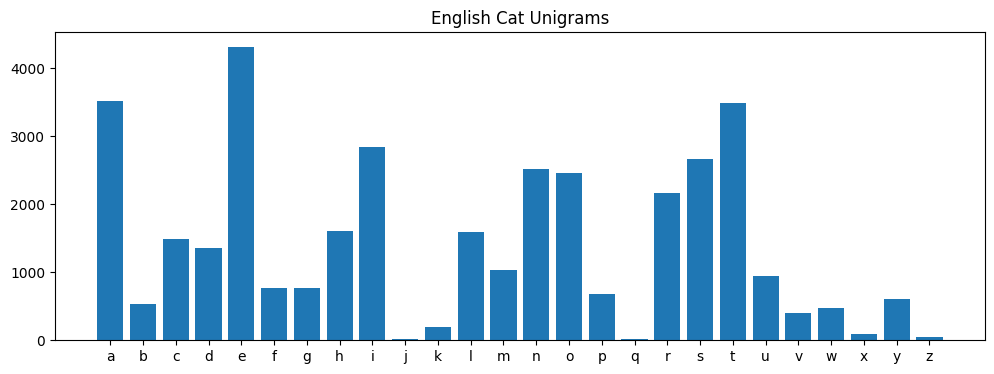

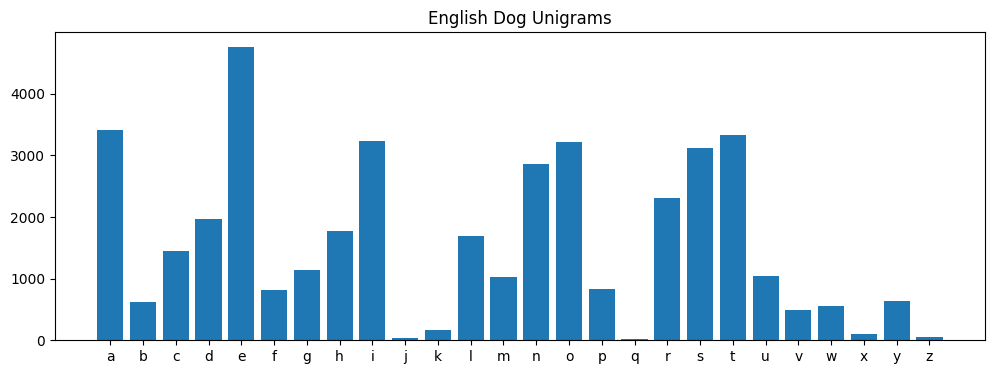

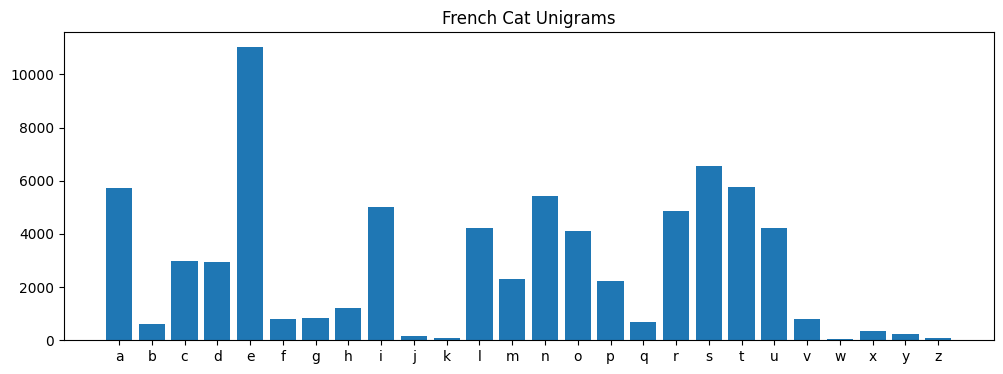

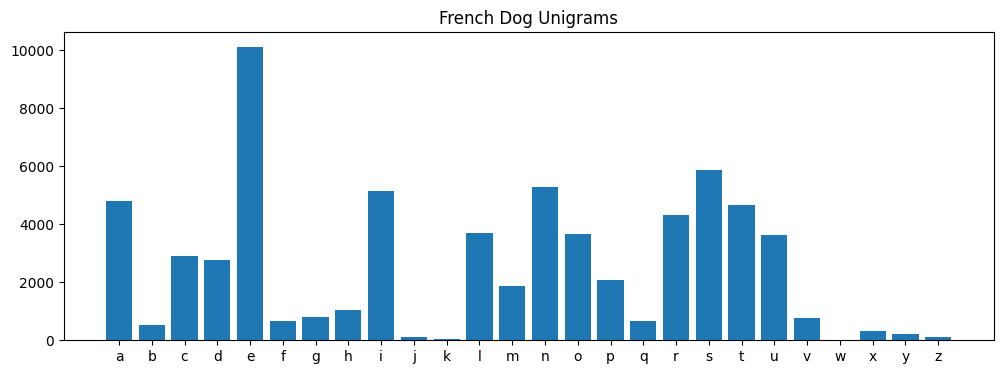

In [270]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English Cat Unigrams')
plt.show()

unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English Dog Unigrams')
plt.show()

unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_fr1)
plt.title('French Cat Unigrams')
plt.show()

unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French Dog Unigrams')
plt.show()


We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

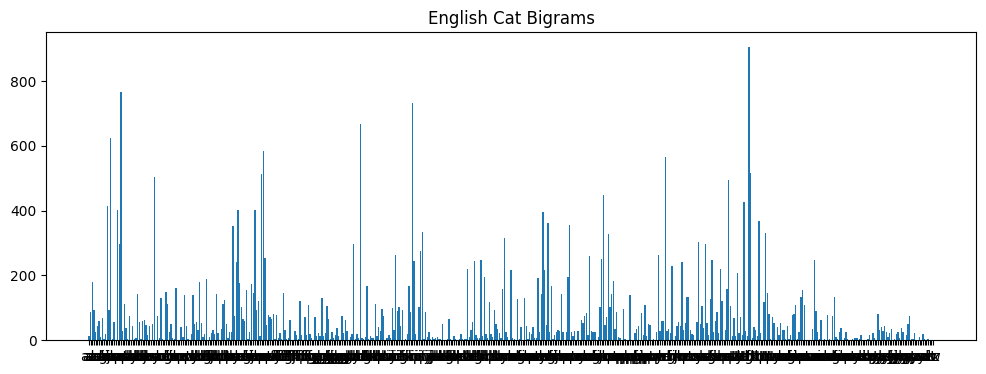

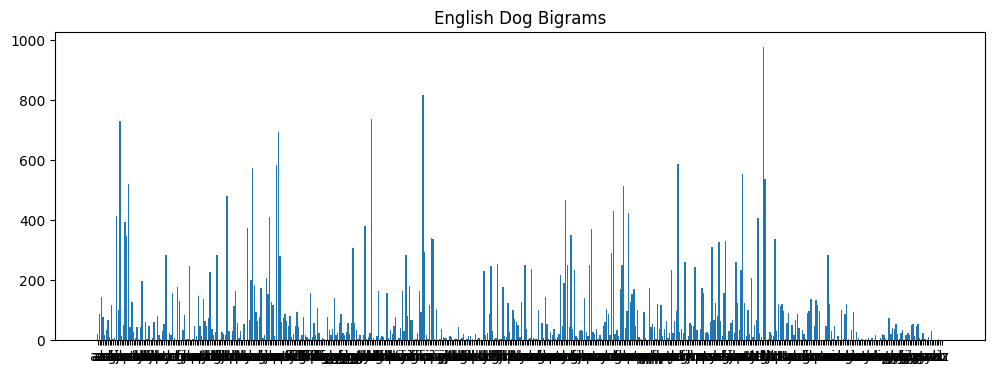

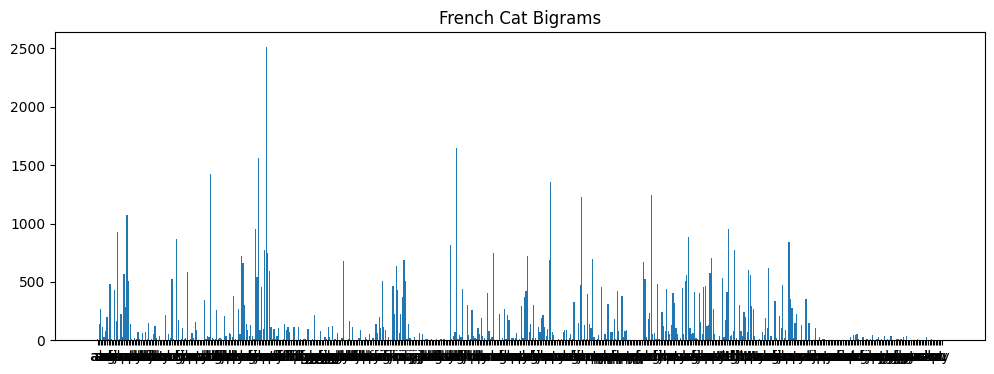

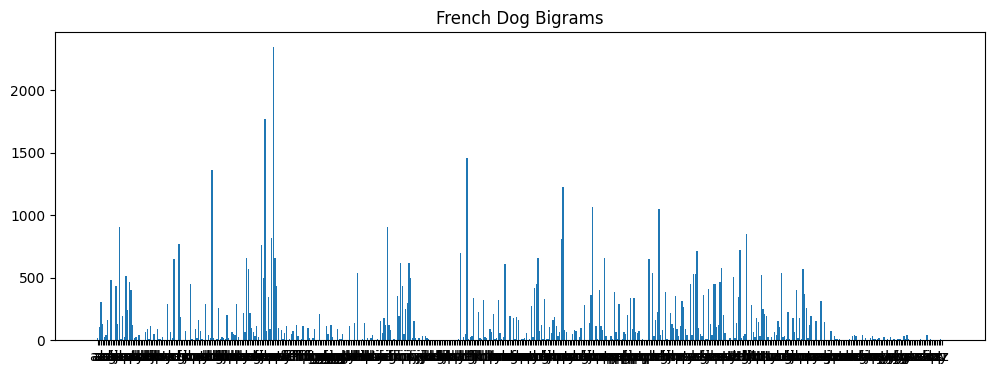

In [271]:
bigram_eng1 = Counter(ngrams(eng1,2))
plothistogram(bigram_eng1)
plt.title('English Cat Bigrams')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English Dog Bigrams')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_fr1)
plt.title('French Cat Bigrams')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French Dog Bigrams')
plt.show()


Another way to visualize bigrams is to use a 2-dimensional graph.

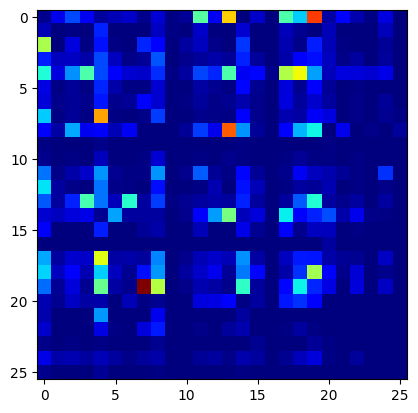

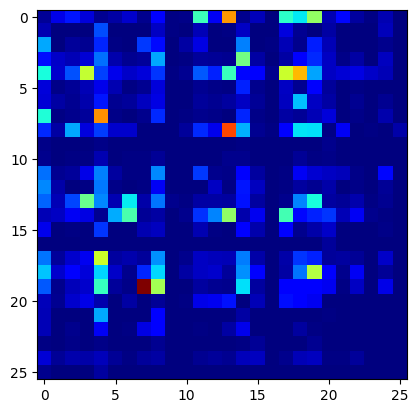

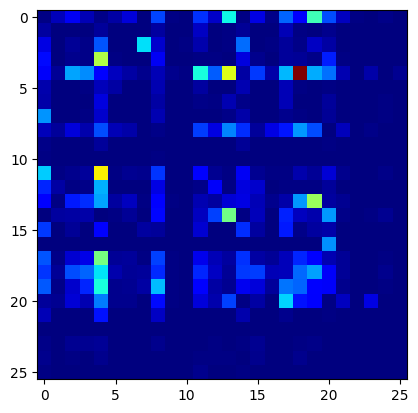

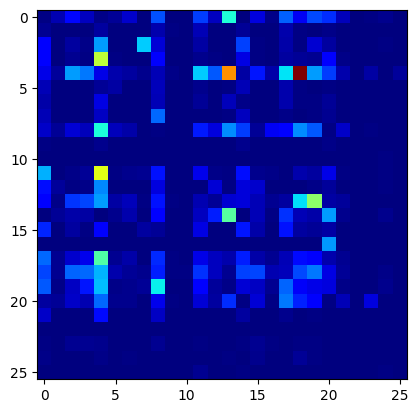

In [272]:
def plotbihistogram(ngram):
    freq = np.zeros((26,26))
    for ii in range(26):
        for jj in range(26):
            freq[ii,jj] = ngram.get((chr(ord('a')+ii), chr(ord('a')+jj)), 0)
    plt.imshow(freq, cmap='jet')

    plt.show()
    return freq

bieng1 = plotbihistogram(bigram_eng1)
bieng2 = plotbihistogram(bigram_eng2)
bifr1 = plotbihistogram(bigram_fr1)
bifr2 = plotbihistogram(bigram_fr2)


Let us look at the top 10 ngrams for each text.

In [273]:
def ind2tup(ind):
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

print('\nEnglish Cat Top Bigrams:')
ShowTopN(bieng1)
print('\nEnglish Dog Top Bigrams:')
ShowTopN(bieng2)
print('\nFrench Cat Top Bigrams:')
ShowTopN(bifr1)
print('\nFrench Dog Top Bigrams:')
ShowTopN(bifr2)



English Cat Top Bigrams:
('t', 'h') : 905.0
('a', 't') : 767.0
('i', 'n') : 732.0
('h', 'e') : 666.0
('a', 'n') : 624.0
('e', 's') : 583.0
('r', 'e') : 565.0
('t', 'i') : 515.0
('e', 'r') : 512.0
('c', 'a') : 504.0

English Dog Top Bigrams:
('t', 'h') : 977.0
('i', 'n') : 816.0
('h', 'e') : 737.0
('a', 'n') : 730.0
('e', 's') : 695.0
('r', 'e') : 587.0
('e', 'r') : 583.0
('e', 'd') : 575.0
('s', 't') : 554.0
('t', 'i') : 536.0

French Cat Top Bigrams:
('e', 's') : 2513.0
('l', 'e') : 1648.0
('e', 'n') : 1558.0
('d', 'e') : 1421.0
('n', 't') : 1352.0
('r', 'e') : 1243.0
('o', 'n') : 1224.0
('a', 't') : 1071.0
('e', 'l') : 953.0
('t', 'e') : 953.0

French Dog Top Bigrams:
('e', 's') : 2348.0
('e', 'n') : 1771.0
('l', 'e') : 1459.0
('d', 'e') : 1365.0
('n', 't') : 1223.0
('o', 'n') : 1069.0
('r', 'e') : 1052.0
('a', 'n') : 909.0
('i', 'e') : 906.0
('t', 'i') : 847.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [274]:
from keras.datasets import mnist

# Load the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [275]:
no1 = train_X[train_y==2,:,:]
no0 = train_X[train_y==3,:,:]

Let us visualize a few images here:

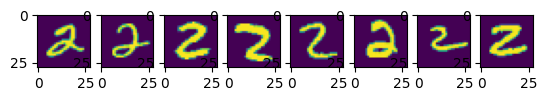

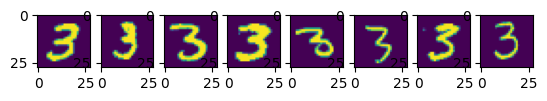

In [276]:
for ii in range(8):
  plt.subplot(1, 8, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(8):
  plt.subplot(1, 8, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [277]:
sum1 = np.sum(no1>0, (0,2)) # threshold before adding up
sum0 = np.sum(no0>0, (0,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

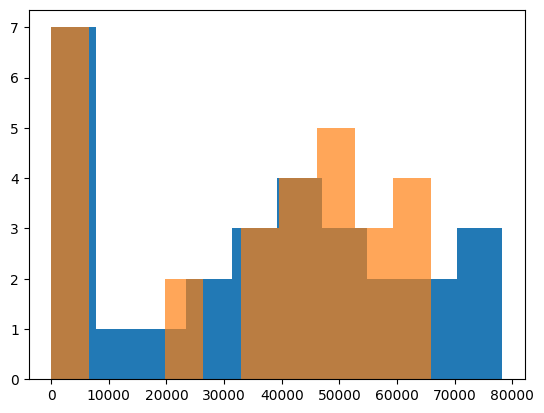

In [278]:
plt.hist(sum1, alpha=0.99);
plt.hist(sum0, alpha=0.69);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [279]:
def cumArray(img):
    img2 = img.copy()
    for row in range(1, img2.shape[0]):  # changed from shape[1] to shape[0] for clarity
        img2[row, :] = img2[row, :] + img2[row-1, :]  # cumulative sum along rows
    img2 = img2 > 0
    return img2

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 1)  # rotated differently
    im3 = np.rot90(cumArray(np.rot90(img, 3)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 2)), 3)

    hull = im1 & im2 & im3 & im4  # binary image with holes filled
    hole = hull & ~(img > 0)      # remove original digit to leave holes
    return hole


Visualize a few:

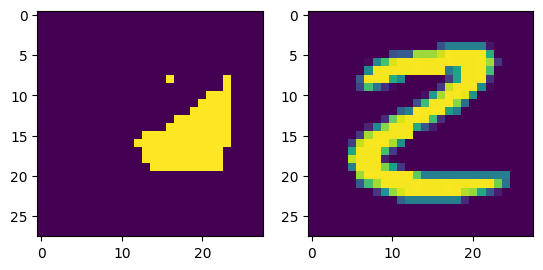

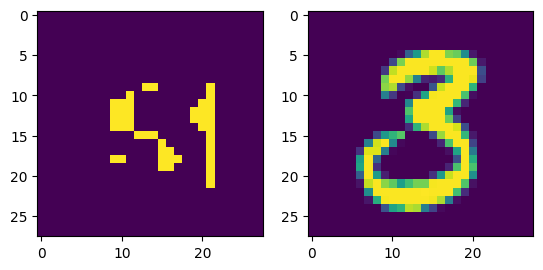

In [280]:
imgs = [no1[512,:,:],  no0[250,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

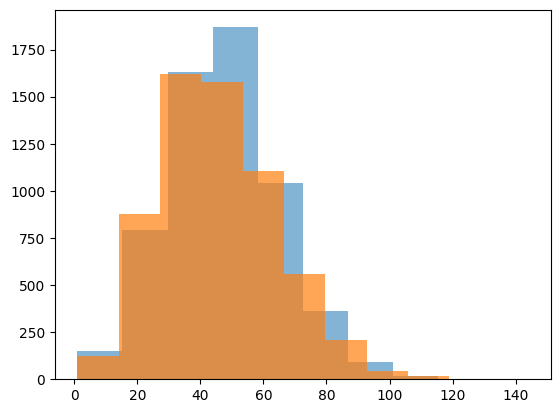

In [281]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.55);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [282]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

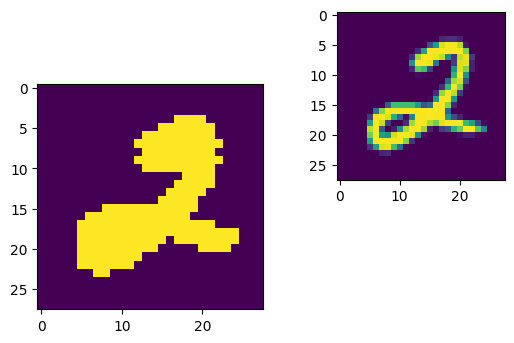

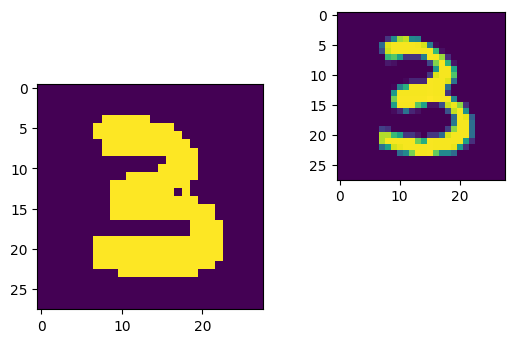

In [283]:
imgs = [no1[1006,:,:],  no0[1006,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(2,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

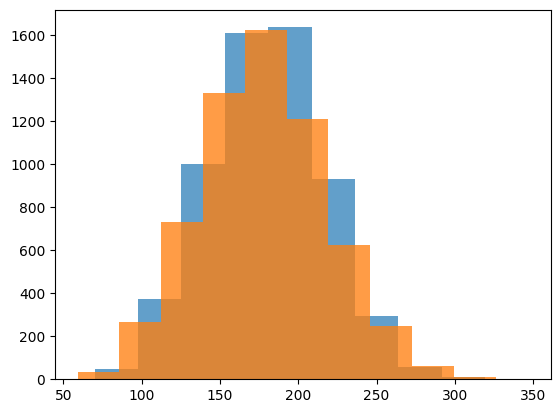

In [284]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.77);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [285]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

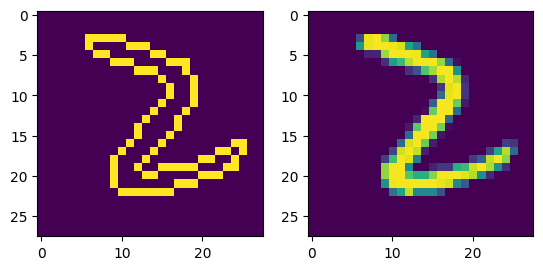

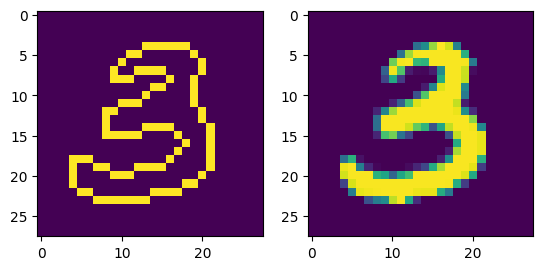

In [286]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

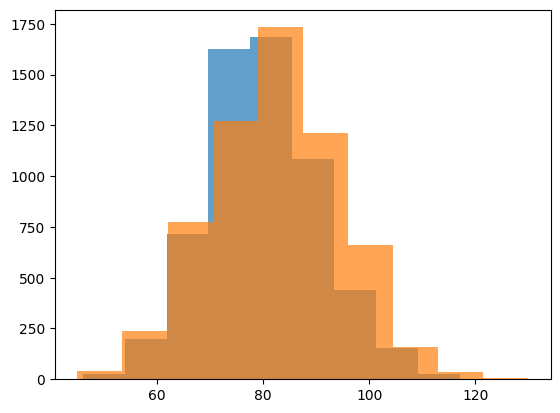

In [287]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

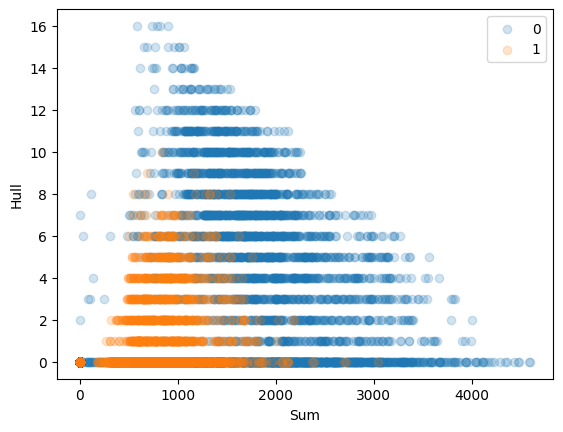

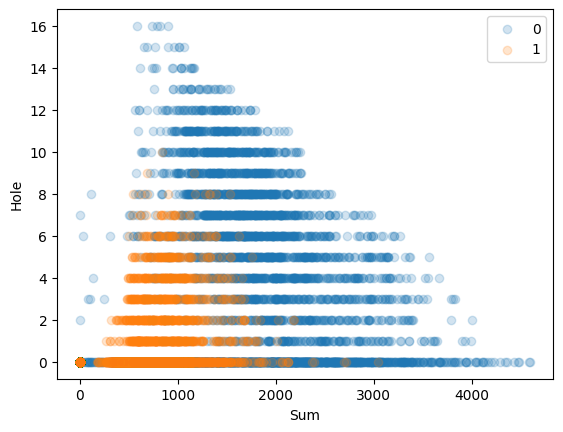

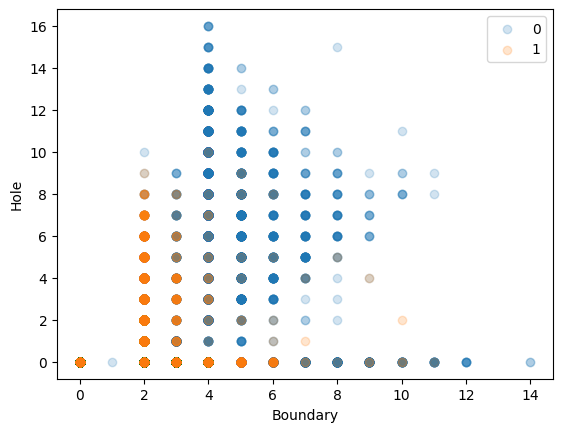

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from scipy.ndimage import binary_dilation

# Load MNIST
(train_X, train_y), (test_X, test_y) = mnist.load_data()
digit0_images = train_X[train_y == 0]
digit1_images = train_X[train_y == 1]

# Functions
def cumArray(img):
    img2 = img.copy()
    for i in range(1, img2.shape[0]):
        img2[i,:] += img2[i-1,:]
    return img2 > 0

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 1)
    im3 = np.rot90(cumArray(np.rot90(img, 3)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 2)), 3)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole

def getBoundary(img):
    boundary = binary_dilation(img>0) & ~(img>0)
    return boundary

# Prepare features across multiple images
def compute_features(images):
    sum_list, hull_list, hole_list, bound_list = [], [], [], []
    for img in images:
        sum_list.extend(img.sum(axis=1))
        hull_list.extend(getHolePixels(img).sum(axis=1))
        hole_list.extend(getHolePixels(img).sum(axis=1))
        bound_list.extend(getBoundary(img).sum(axis=1))
    return np.array(sum_list), np.array(hull_list), np.array(hole_list), np.array(bound_list)

# Use first 200 images from each digit for more points
sum0, hull0, hole0, bound0 = compute_features(digit0_images[:200])
sum1, hull1, hole1, bound1 = compute_features(digit1_images[:200])

# Plot: Sum vs Hull
plt.scatter(sum0, hull0, alpha=0.2)
plt.scatter(sum1, hull1, alpha=0.2)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Plot: Sum vs Hole
plt.scatter(sum0, hole0, alpha=0.2)
plt.scatter(sum1, hole1, alpha=0.2)
plt.xlabel('Sum')
plt.ylabel('Hole')
plt.legend(['0','1'])
plt.show()

# Plot: Boundary vs Hole
plt.scatter(bound0, hole0, alpha=0.2)
plt.scatter(bound1, hole1, alpha=0.2)
plt.xlabel('Boundary')
plt.ylabel('Hole')
plt.legend(['0','1'])
plt.show()


Now let us try plotting 3 features together.

In [289]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

**1. Which is the best combination of features?**

The best combination usually depends on the task. For digits, features like sum of pixels, hull area, holes, and boundary pixels often work well together because they capture both shape and structure. Using complementary features that highlight different aspects of the image usually gives the most useful information.





**2. How would you test or visualize four or more features?**

For four or more features, simple 2D scatter plots aren’t enough. You can use:

i. Pair plots (plot every feature against every other feature)

ii. 3D scatter plots for three features at a time

iii. Heatmaps or parallel coordinate plots to see patterns across all features at once

iv. Dimensionality reduction techniques like PCA to compress features into 2D or 3D for visualization.




3. Can you come up with your own features?

Ans:
Yes! You can create features that capture different aspects of the digits, like:

a. Number of vertical/horizontal strokes

b. Aspect ratio of the digit

c. Density of pixels in the center vs edges

d. Moments or orientation
Custom features often improve classification if they capture meaningful differences between digits.

4. Will these features work for different classes other than 0 and 1?

They might, but not always equally well. Some features (like holes or hull) are especially informative for digits 0 and 1 because their shapes are distinct. For digits with similar shapes, like 3 and 8, you may need additional features to differentiate them.

5. What will happen if we take more than two classes at a time?

If you include multiple classes, patterns may overlap more, making it harder to separate classes using only a few features. Visualization becomes trickier, and you might need more advanced techniques or machine learning models to handle multi-class data effectively.